<a href="https://colab.research.google.com/github/Tiara-la/stacking-p2p-lending/blob/main/4_No_normal_Final_Stack_xgb_prosper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Collection**

## **Kaggle**

In [2]:
# install the Kaggle API client
! pip install -q kaggle

In [3]:
# Unggah file kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tiaralailatulnikmah","key":"1a294e2d607cef4fb50b5cd7366998e0"}'}

In [4]:
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d skihikingkevin/online-p2p-lending

 91% 73.0M/80.2M [00:00<00:00, 83.3MB/s]
100% 80.2M/80.2M [00:01<00:00, 82.8MB/s]


In [6]:
# melakukan unzip pada dataset yang telah di download
import zipfile,os
local_zip = '/content/online-p2p-lending.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

## **Data Import**

In [68]:
import pandas as pd
import numpy as np
df = pd.read_csv('/tmp/Master_Loan_Summary.csv',  delimiter=',')
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source
0,10149342,27050.0,36,0.1099,885.460000,B,2013-12-01T00:00,debt_consolidation,0.00,27050.00,4702.53,0.0,0.0,2016-07-01T00:00,2016-08-01T00:00,0,COMPLETED,Lending Club
1,10149488,4800.0,36,0.1099,157.130000,B,2013-12-01T00:00,home_improvement,0.00,4800.00,357.52,0.0,0.0,2014-09-01T00:00,2014-10-01T00:00,0,COMPLETED,Lending Club
2,10148122,12000.0,36,0.0762,373.940000,A,2013-12-01T00:00,debt_consolidation,0.00,12000.00,1397.54,0.0,0.0,2016-06-01T00:00,2016-07-01T00:00,0,COMPLETED,Lending Club
3,10119623,12000.0,36,0.1199,398.520000,B,2013-12-01T00:00,debt_consolidation,0.00,12000.00,2346.48,0.0,0.0,2017-01-01T00:00,2017-02-01T00:00,0,COMPLETED,Lending Club
4,10159498,12000.0,36,0.0662,368.450000,A,2013-12-01T00:00,debt_consolidation,0.00,12000.00,1263.95,0.0,0.0,2017-01-01T00:00,2017-02-01T00:00,0,COMPLETED,Lending Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875141,1081905,10000.0,36,0.0934,319.582092,B,2018-06-29,NaN,9667.17,332.83,86.75,0.0,0.0,2018-09-29,2018-08-29,0,CURRENT,Prosper
2875142,1081908,10000.0,36,0.1214,332.812163,C,2018-06-29,NaN,9766.97,233.03,99.78,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT,Prosper
2875143,1081947,4000.0,60,0.2455,116.352367,E,2018-06-29,NaN,3964.36,35.64,80.71,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT,Prosper
2875144,1081797,30000.0,60,0.1878,774.589469,D,2018-06-29,NaN,29688.48,311.52,463.07,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT,Prosper


In [69]:
df = df[df['data_source'] == 'Prosper']
df

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source
1961527,80355,5000.0,36,0.2566,200.548615,E,2013-01-04,NaN,0.00,5000.00,1793.31,0.0,0.0,2015-07-04,2016-01-04,0,COMPLETED,Prosper
1961528,80708,15500.0,36,0.1679,550.998674,C,2013-01-04,NaN,0.00,15500.00,3452.00,0.0,0.0,2015-06-04,2016-01-04,0,COMPLETED,Prosper
1961529,80800,10000.0,60,0.2557,296.864320,E,2013-01-07,NaN,0.00,10000.00,4084.82,0.0,0.0,2015-09-07,2018-01-07,0,COMPLETED,Prosper
1961530,81062,15000.0,60,0.1752,376.995481,C,2013-01-07,NaN,0.00,15000.00,4133.78,0.0,0.0,2015-10-07,2018-01-07,0,COMPLETED,Prosper
1961531,80676,2500.0,36,0.0789,78.214113,A,2013-01-07,NaN,0.00,2499.99,228.74,0.0,0.0,2015-04-07,2016-01-07,0,COMPLETED,Prosper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875141,1081905,10000.0,36,0.0934,319.582092,B,2018-06-29,NaN,9667.17,332.83,86.75,0.0,0.0,2018-09-29,2018-08-29,0,CURRENT,Prosper
2875142,1081908,10000.0,36,0.1214,332.812163,C,2018-06-29,NaN,9766.97,233.03,99.78,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT,Prosper
2875143,1081947,4000.0,60,0.2455,116.352367,E,2018-06-29,NaN,3964.36,35.64,80.71,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT,Prosper
2875144,1081797,30000.0,60,0.1878,774.589469,D,2018-06-29,NaN,29688.48,311.52,463.07,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT,Prosper


In [70]:
df = df.drop(['data_source'], axis=1)
df

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description
1961527,80355,5000.0,36,0.2566,200.548615,E,2013-01-04,NaN,0.00,5000.00,1793.31,0.0,0.0,2015-07-04,2016-01-04,0,COMPLETED
1961528,80708,15500.0,36,0.1679,550.998674,C,2013-01-04,NaN,0.00,15500.00,3452.00,0.0,0.0,2015-06-04,2016-01-04,0,COMPLETED
1961529,80800,10000.0,60,0.2557,296.864320,E,2013-01-07,NaN,0.00,10000.00,4084.82,0.0,0.0,2015-09-07,2018-01-07,0,COMPLETED
1961530,81062,15000.0,60,0.1752,376.995481,C,2013-01-07,NaN,0.00,15000.00,4133.78,0.0,0.0,2015-10-07,2018-01-07,0,COMPLETED
1961531,80676,2500.0,36,0.0789,78.214113,A,2013-01-07,NaN,0.00,2499.99,228.74,0.0,0.0,2015-04-07,2016-01-07,0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875141,1081905,10000.0,36,0.0934,319.582092,B,2018-06-29,NaN,9667.17,332.83,86.75,0.0,0.0,2018-09-29,2018-08-29,0,CURRENT
2875142,1081908,10000.0,36,0.1214,332.812163,C,2018-06-29,NaN,9766.97,233.03,99.78,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT
2875143,1081947,4000.0,60,0.2455,116.352367,E,2018-06-29,NaN,3964.36,35.64,80.71,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT
2875144,1081797,30000.0,60,0.1878,774.589469,D,2018-06-29,NaN,29688.48,311.52,463.07,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT


In [71]:
df = df.reset_index(drop=True)
df

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description
0,80355,5000.0,36,0.2566,200.548615,E,2013-01-04,NaN,0.00,5000.00,1793.31,0.0,0.0,2015-07-04,2016-01-04,0,COMPLETED
1,80708,15500.0,36,0.1679,550.998674,C,2013-01-04,NaN,0.00,15500.00,3452.00,0.0,0.0,2015-06-04,2016-01-04,0,COMPLETED
2,80800,10000.0,60,0.2557,296.864320,E,2013-01-07,NaN,0.00,10000.00,4084.82,0.0,0.0,2015-09-07,2018-01-07,0,COMPLETED
3,81062,15000.0,60,0.1752,376.995481,C,2013-01-07,NaN,0.00,15000.00,4133.78,0.0,0.0,2015-10-07,2018-01-07,0,COMPLETED
4,80676,2500.0,36,0.0789,78.214113,A,2013-01-07,NaN,0.00,2499.99,228.74,0.0,0.0,2015-04-07,2016-01-07,0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913614,1081905,10000.0,36,0.0934,319.582092,B,2018-06-29,NaN,9667.17,332.83,86.75,0.0,0.0,2018-09-29,2018-08-29,0,CURRENT
913615,1081908,10000.0,36,0.1214,332.812163,C,2018-06-29,NaN,9766.97,233.03,99.78,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT
913616,1081947,4000.0,60,0.2455,116.352367,E,2018-06-29,NaN,3964.36,35.64,80.71,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT
913617,1081797,30000.0,60,0.1878,774.589469,D,2018-06-29,NaN,29688.48,311.52,463.07,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT


# **Exploratory Data Analysis**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913619 entries, 0 to 913618
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_number                  913619 non-null  int64  
 1   amount_borrowed              913619 non-null  float64
 2   term                         913619 non-null  int64  
 3   borrower_rate                913619 non-null  float64
 4   installment                  913619 non-null  float64
 5   grade                        913619 non-null  object 
 6   origination_date             913619 non-null  object 
 7   listing_title                50541 non-null   object 
 8   principal_balance            913619 non-null  float64
 9   principal_paid               913619 non-null  float64
 10  interest_paid                913619 non-null  float64
 11  late_fees_paid               913619 non-null  float64
 12  debt_sale_proceeds_received  913619 non-null  float64
 13 

In [7]:
df.describe()

,loan_number,amount_borrowed,term,borrower_rate,installment,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,days_past_due
count,9.136190e+05,913619.000000,913619.000000,913619.000000,913619.000000,913619.000000,913619.000000,913619.000000,913619.000000,913619.0,913619.000000
mean,5.821678e+05,13332.617882,43.128871,0.153106,407.563923,4307.853990,8104.099338,2142.619795,5.808205,0.0,15.807546
std,2.858683e+05,7946.272924,10.982495,0.065643,235.237354,6514.352055,7514.961075,2073.576736,34.922043,0.0,109.942776
min,7.965000e+04,2000.000000,12.000000,0.053100,40.066394,0.000000,-15.000000,-8.255100,0.000000,0.0,0.000000
25%,3.309195e+05,7500.000000,36.000000,0.103900,231.905584,0.000000,2198.805000,702.335000,0.000000,0.0,0.000000
50%,5.946240e+05,12000.000000,36.000000,0.137500,361.373478,0.000000,5722.420000,1497.500000,0.000000,0.0,0.000000
75%,8.324515e+05,18000.000000,60.000000,0.192000,531.325392,7162.990000,12000.000000,2875.450000,0.000000,0.0,0.000000
max,1.081986e+06,40000.000000,60.000000,0.319200,2251.506148,39546.430000,40000.000000,18575.600000,1676.850000,0.0,2029.000000


In [8]:
plt.figure(figsize=(20, 8))

uniq = df['loan_status_description'].astype(str).unique()
grade = sorted(uniq.tolist())
sns.countplot(x='loan_status_description', data=df, hue='loan_status_description', order=grade)

NameError: ignored

In [ ]:
df["loan_status_description"].value_counts(dropna= False)

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

installment memiliki korelasi baik dengan amount_borrowed

In [ ]:
df.describe()

In [ ]:
print("Jumlah unique value fitur last_payment_date:", len(df["last_payment_date"].unique()))
print("Jumlah unique value fitur next_payment_due_date:", len(df["next_payment_due_date"].unique()))
print("Jumlah unique value fitur origination_date:", len(df["origination_date"].unique()))

# **Preprocessing Data**

## **Data Cleaning: Missing Values Check**



In [72]:
#preprocessing data
#cek mising value nilai Null
df.isnull().sum() 

loan_number                         0
amount_borrowed                     0
term                                0
borrower_rate                       0
installment                         0
grade                               0
origination_date                    0
listing_title                  863078
principal_balance                   0
principal_paid                      0
interest_paid                       0
late_fees_paid                      0
debt_sale_proceeds_received         0
last_payment_date                   0
next_payment_due_date               0
days_past_due                       0
loan_status_description             0
dtype: int64

In [73]:
# The length of the data
print(f"The Length of the data: {df.shape}")

The Length of the data: (913619, 17)


In [74]:
# Missing values nilai NaN
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'listing_title': number of missing values '863078' ==> '94.468%'


In [75]:
df = df.drop(['listing_title'], axis=1)

In [76]:
df.isna().sum()

loan_number                    0
amount_borrowed                0
term                           0
borrower_rate                  0
installment                    0
grade                          0
origination_date               0
principal_balance              0
principal_paid                 0
interest_paid                  0
late_fees_paid                 0
debt_sale_proceeds_received    0
last_payment_date              0
next_payment_due_date          0
days_past_due                  0
loan_status_description        0
dtype: int64

In [77]:
df.describe()

,loan_number,amount_borrowed,term,borrower_rate,installment,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,days_past_due
count,9.136190e+05,913619.000000,913619.000000,913619.000000,913619.000000,913619.000000,913619.000000,913619.000000,913619.000000,913619.0,913619.000000
mean,5.821678e+05,13332.617882,43.128871,0.153106,407.563923,4307.853990,8104.099338,2142.619795,5.808205,0.0,15.807546
std,2.858683e+05,7946.272924,10.982495,0.065643,235.237354,6514.352055,7514.961075,2073.576736,34.922043,0.0,109.942776
min,7.965000e+04,2000.000000,12.000000,0.053100,40.066394,0.000000,-15.000000,-8.255100,0.000000,0.0,0.000000
25%,3.309195e+05,7500.000000,36.000000,0.103900,231.905584,0.000000,2198.805000,702.335000,0.000000,0.0,0.000000
50%,5.946240e+05,12000.000000,36.000000,0.137500,361.373478,0.000000,5722.420000,1497.500000,0.000000,0.0,0.000000
75%,8.324515e+05,18000.000000,60.000000,0.192000,531.325392,7162.990000,12000.000000,2875.450000,0.000000,0.0,0.000000
max,1.081986e+06,40000.000000,60.000000,0.319200,2251.506148,39546.430000,40000.000000,18575.600000,1676.850000,0.0,2029.000000


## **Data Cleaning: Outlier Check**

### **amount_borrowed**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


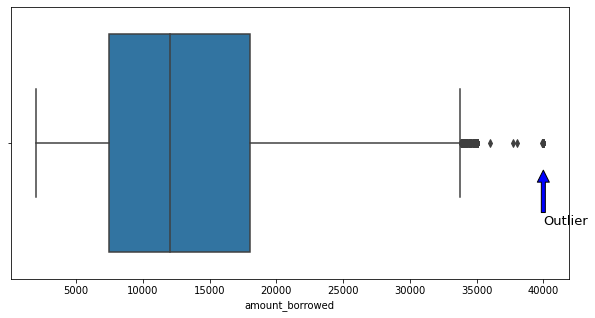

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['amount_borrowed'])
plt.annotate('Outlier', (df['amount_borrowed'].describe()['max'],0.1), xytext = (df['amount_borrowed'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['amount_borrowed'].describe()['75%'] - df['amount_borrowed'].describe()['25%']

In [79]:
# Q1, Q3, dan IQR
Q1 = df['amount_borrowed'].quantile(0.25)
Q3 = df['amount_borrowed'].quantile(0.75)
IQR = Q3 - Q1

In [80]:
# Removing outliers
df = df[~((df['amount_borrowed'] < (Q1-1.5*IQR)) | (df['amount_borrowed'] > (Q3+1.5*IQR)))]


In [81]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (883499, 16)


### **borrower_rate**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


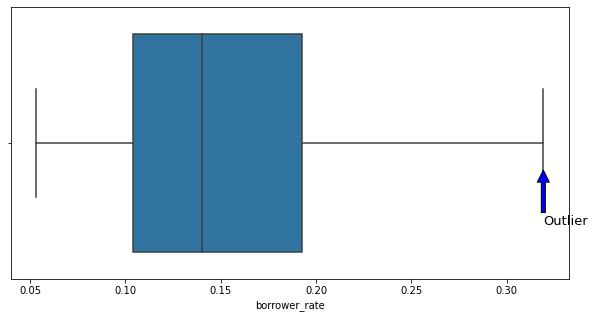

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['borrower_rate'])
plt.annotate('Outlier', (df['borrower_rate'].describe()['max'],0.1), xytext = (df['borrower_rate'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['borrower_rate'].describe()['75%'] - df['borrower_rate'].describe()['25%']

In [83]:
# Q1, Q3, dan IQR
Q1 = df['borrower_rate'].quantile(0.25)
Q3 = df['borrower_rate'].quantile(0.75)
IQR = Q3 - Q1

In [84]:
# Removing outliers
df = df[~((df['borrower_rate'] < (Q1-1.5*IQR)) | (df['borrower_rate'] > (Q3+1.5*IQR)))]


In [85]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (883499, 16)


### **installment**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


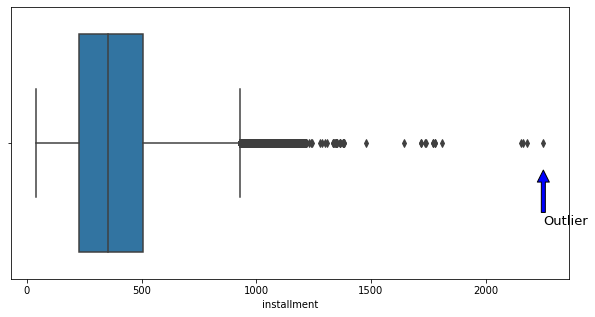

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['installment'])
plt.annotate('Outlier', (df['installment'].describe()['max'],0.1), xytext = (df['installment'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['installment'].describe()['75%'] - df['installment'].describe()['25%']

In [87]:
# Q1, Q3, dan IQR
Q1 = df['installment'].quantile(0.25)
Q3 = df['installment'].quantile(0.75)
IQR = Q3 - Q1

In [88]:
# Removing outliers
df = df[~((df['installment'] < (Q1-1.5*IQR)) | (df['installment'] > (Q3+1.5*IQR)))]


In [89]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (866490, 16)


### **principal_balance**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


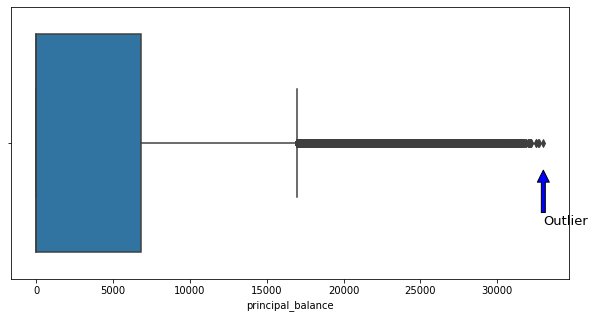

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['principal_balance'])
plt.annotate('Outlier', (df['principal_balance'].describe()['max'],0.1), xytext = (df['principal_balance'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['principal_balance'].describe()['75%'] - df['principal_balance'].describe()['25%']

In [91]:
# Q1, Q3, dan IQR
Q1 = df['principal_balance'].quantile(0.25)
Q3 = df['principal_balance'].quantile(0.75)
IQR = Q3 - Q1

In [92]:
# Removing outliers
df = df[~((df['principal_balance'] < (Q1-1.5*IQR)) | (df['principal_balance'] > (Q3+1.5*IQR)))]


In [93]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (830829, 16)


### **principal_paid**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


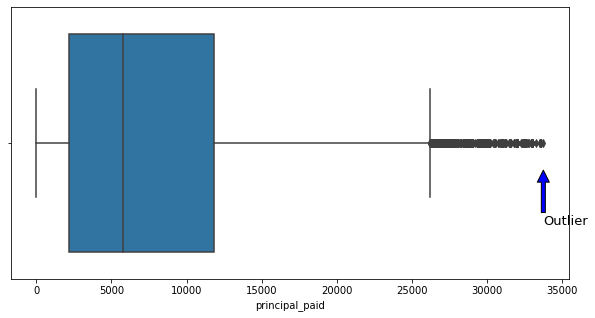

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['principal_paid'])
plt.annotate('Outlier', (df['principal_paid'].describe()['max'],0.1), xytext = (df['principal_paid'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['principal_paid'].describe()['75%'] - df['principal_paid'].describe()['25%']

In [95]:
# Q1, Q3, dan IQR
Q1 = df['principal_paid'].quantile(0.25)
Q3 = df['principal_paid'].quantile(0.75)
IQR = Q3 - Q1

In [96]:
# Removing outliers
df = df[~((df['principal_paid'] < (Q1-1.5*IQR)) | (df['principal_paid'] > (Q3+1.5*IQR)))]


In [97]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (824797, 16)


### **Interest_paid**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


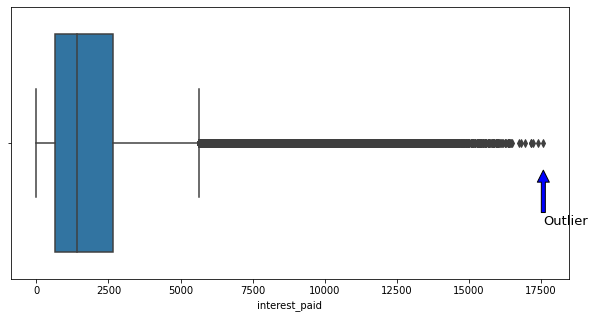

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['interest_paid'])
plt.annotate('Outlier', (df['interest_paid'].describe()['max'],0.1), xytext = (df['interest_paid'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['interest_paid'].describe()['75%'] - df['interest_paid'].describe()['25%']

In [99]:
# Q1, Q3, dan IQR
Q1 = df['interest_paid'].quantile(0.25)
Q3 = df['interest_paid'].quantile(0.75)
IQR = Q3 - Q1

In [100]:
# Removing outliers
df = df[~((df['interest_paid'] < (Q1-1.5*IQR)) | (df['interest_paid'] > (Q3+1.5*IQR)))]


In [101]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (779042, 16)


### **late_fees_paid**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


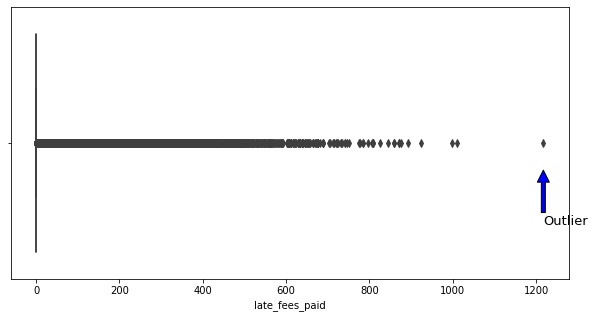

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['late_fees_paid'])
plt.annotate('Outlier', (df['late_fees_paid'].describe()['max'],0.1), xytext = (df['late_fees_paid'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['late_fees_paid'].describe()['75%'] - df['late_fees_paid'].describe()['25%']

In [103]:
# Q1, Q3, dan IQR
Q1 = df['late_fees_paid'].quantile(0.25)
Q3 = df['late_fees_paid'].quantile(0.75)
IQR = Q3 - Q1

In [104]:
# Removing outliers
df = df[~((df['late_fees_paid'] < (Q1-1.5*IQR)) | (df['late_fees_paid'] > (Q3+1.5*IQR)))]


In [105]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (727131, 16)


### **debt_sale_proceeds_received**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


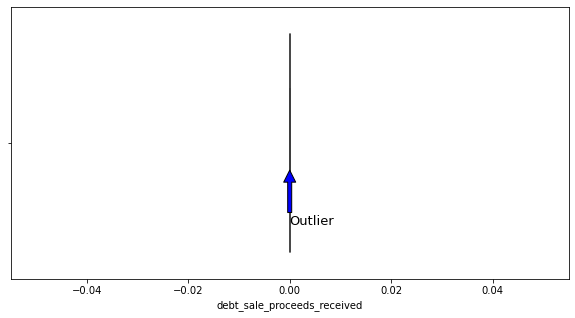

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['debt_sale_proceeds_received'])
plt.annotate('Outlier', (df['debt_sale_proceeds_received'].describe()['max'],0.1), xytext = (df['debt_sale_proceeds_received'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['debt_sale_proceeds_received'].describe()['75%'] - df['debt_sale_proceeds_received'].describe()['25%']

In [107]:
# Q1, Q3, dan IQR
Q1 = df['debt_sale_proceeds_received'].quantile(0.25)
Q3 = df['debt_sale_proceeds_received'].quantile(0.75)
IQR = Q3 - Q1

In [108]:
# Removing outliers
df = df[~((df['debt_sale_proceeds_received'] < (Q1-1.5*IQR)) | (df['debt_sale_proceeds_received'] > (Q3+1.5*IQR)))]


In [109]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (727131, 16)


### **term**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


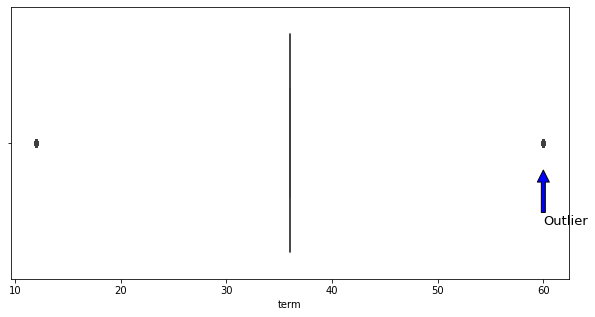

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['term'])
plt.annotate('Outlier', (df['term'].describe()['max'],0.1), xytext = (df['term'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['term'].describe()['75%'] - df['term'].describe()['25%']

In [111]:
# Q1, Q3, dan IQR
Q1 = df['term'].quantile(0.25)
Q3 = df['term'].quantile(0.75)
IQR = Q3 - Q1

In [112]:
# Removing outliers
df = df[~((df['term'] < (Q1-1.5*IQR)) | (df['term'] > (Q3+1.5*IQR)))]


In [113]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (549838, 16)


### **days_past_due**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


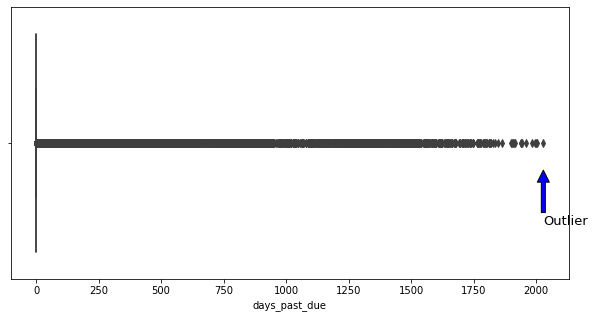

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['days_past_due'])
plt.annotate('Outlier', (df['days_past_due'].describe()['max'],0.1), xytext = (df['days_past_due'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['days_past_due'].describe()['75%'] - df['days_past_due'].describe()['25%']

In [115]:
# Q1, Q3, dan IQR
Q1 = df['days_past_due'].quantile(0.25)
Q3 = df['days_past_due'].quantile(0.75)
IQR = Q3 - Q1

In [116]:
# Removing outliers
df = df[~((df['days_past_due'] < (Q1-1.5*IQR)) | (df['days_past_due'] > (Q3+1.5*IQR)))]


In [117]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (525401, 16)


## **Data Cleaning: Removing Features Unused**

In [118]:
df = df.drop(['last_payment_date', 'next_payment_due_date', 'origination_date', 'late_fees_paid',	'debt_sale_proceeds_received','days_past_due'], axis=1)
df

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,principal_balance,principal_paid,interest_paid,loan_status_description
0,80355,5000.00,36,0.2566,200.548615,E,0.00,5000.00,1793.31,COMPLETED
1,80708,15500.00,36,0.1679,550.998674,C,0.00,15500.00,3452.00,COMPLETED
4,80676,2500.00,36,0.0789,78.214113,A,0.00,2499.99,228.74,COMPLETED
5,82158,3983.31,36,0.2859,166.036273,F,0.00,3983.30,1582.13,COMPLETED
6,81659,5000.00,36,0.2566,200.548615,E,0.00,5000.00,1598.26,COMPLETED
...,...,...,...,...,...,...,...,...,...,...
913611,1081977,11400.00,36,0.0964,365.922141,B,11124.41,275.59,90.33,CURRENT
913612,1081968,9800.00,36,0.0531,295.080729,A,9547.69,252.31,42.77,CURRENT
913614,1081905,10000.00,36,0.0934,319.582092,B,9667.17,332.83,86.75,CURRENT
913615,1081908,10000.00,36,0.1214,332.812163,C,9766.97,233.03,99.78,CURRENT


# **Encoder**

In [119]:
label_encode = ['grade']

In [120]:
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand word labels. 
label_encoder = LabelEncoder()
# Encode labels in column 'grade'. 
df[label_encode] =df[label_encode].apply(LabelEncoder().fit_transform)

In [121]:
df

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,principal_balance,principal_paid,interest_paid,loan_status_description
0,80355,5000.00,36,0.2566,200.548615,4,0.00,5000.00,1793.31,COMPLETED
1,80708,15500.00,36,0.1679,550.998674,2,0.00,15500.00,3452.00,COMPLETED
4,80676,2500.00,36,0.0789,78.214113,0,0.00,2499.99,228.74,COMPLETED
5,82158,3983.31,36,0.2859,166.036273,5,0.00,3983.30,1582.13,COMPLETED
6,81659,5000.00,36,0.2566,200.548615,4,0.00,5000.00,1598.26,COMPLETED
...,...,...,...,...,...,...,...,...,...,...
913611,1081977,11400.00,36,0.0964,365.922141,1,11124.41,275.59,90.33,CURRENT
913612,1081968,9800.00,36,0.0531,295.080729,0,9547.69,252.31,42.77,CURRENT
913614,1081905,10000.00,36,0.0934,319.582092,1,9667.17,332.83,86.75,CURRENT
913615,1081908,10000.00,36,0.1214,332.812163,2,9766.97,233.03,99.78,CURRENT


In [122]:
df['loan_status_description'].unique()

array(['COMPLETED', 'CURRENT', 'DEFAULTED', 'CANCELLED'], dtype=object)

In [123]:
df["loan_status_description"].value_counts()

COMPLETED    267040
CURRENT      218247
DEFAULTED     38719
CANCELLED      1395
Name: loan_status_description, dtype: int64

In [124]:
cleanup_nums = {"loan_status_description":     {"CURRENT": 0, "COMPLETED": 0, "DEFAULTED": 1, "CHARGEOFF": 1, "CANCELLED": 1}}

In [125]:
df["loan_status_description"].value_counts()

COMPLETED    267040
CURRENT      218247
DEFAULTED     38719
CANCELLED      1395
Name: loan_status_description, dtype: int64

In [126]:
df = df.replace(cleanup_nums)
df.head()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,principal_balance,principal_paid,interest_paid,loan_status_description
0,80355,5000.00,36,0.2566,200.548615,4,0.0,5000.00,1793.31,0
1,80708,15500.00,36,0.1679,550.998674,2,0.0,15500.00,3452.00,0
4,80676,2500.00,36,0.0789,78.214113,0,0.0,2499.99,228.74,0
5,82158,3983.31,36,0.2859,166.036273,5,0.0,3983.30,1582.13,0
6,81659,5000.00,36,0.2566,200.548615,4,0.0,5000.00,1598.26,0


In [127]:
df = df.reset_index(drop=True)
df

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,principal_balance,principal_paid,interest_paid,loan_status_description
0,80355,5000.00,36,0.2566,200.548615,4,0.00,5000.00,1793.31,0
1,80708,15500.00,36,0.1679,550.998674,2,0.00,15500.00,3452.00,0
2,80676,2500.00,36,0.0789,78.214113,0,0.00,2499.99,228.74,0
3,82158,3983.31,36,0.2859,166.036273,5,0.00,3983.30,1582.13,0
4,81659,5000.00,36,0.2566,200.548615,4,0.00,5000.00,1598.26,0
...,...,...,...,...,...,...,...,...,...,...
525396,1081977,11400.00,36,0.0964,365.922141,1,11124.41,275.59,90.33,0
525397,1081968,9800.00,36,0.0531,295.080729,0,9547.69,252.31,42.77,0
525398,1081905,10000.00,36,0.0934,319.582092,1,9667.17,332.83,86.75,0
525399,1081908,10000.00,36,0.1214,332.812163,2,9766.97,233.03,99.78,0


# **SMOTE**

In [128]:
#over sampling data SMOTE
loan_data = df
X = loan_data.drop(['loan_status_description'], axis=1)
y = loan_data['loan_status_description']

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X,y)

loan_datas = X_sm
loan_datas['loan_status_description'] = y_sm

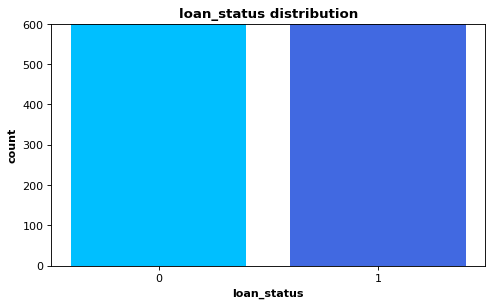

Data before over-sampling
0    485287
1     40114
Name: loan_status_description, dtype: int64 

Data after over-sampling
0    485287
1    485287
Name: loan_status_description, dtype: int64


In [129]:
#melihat hasil dari Over Sampling SMOTE
import numpy as np
import matplotlib.pyplot as plt
height = y_sm.value_counts()
labels = ( '0', '1')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('loan_status distribution', fontweight='bold')
plt.xlabel('loan_status', fontweight='bold')
plt.ylabel('count', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue'])
plt.xticks(y_pos, labels)
plt.show()

print("Data before over-sampling")
print(df['loan_status_description'].value_counts(), "\n")

print("Data after over-sampling")
print(loan_datas['loan_status_description'].value_counts())

In [130]:
X = loan_datas.drop(['loan_status_description'], axis=1)
y = loan_datas['loan_status_description']

# **Data Normalization**

In [148]:
final_data_std = loan_datas.drop(['loan_status_description'], axis=1)

In [149]:
from sklearn.preprocessing import MinMaxScaler
 
# scale features
scaler = MinMaxScaler()
model=scaler.fit(final_data_std)
scaled_datas=model.transform(final_data_std)
Scaled_data = pd.DataFrame(scaled_datas,columns=final_data_std.columns,index=loan_datas.index)

In [150]:
Scaled_data

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,principal_balance,principal_paid,interest_paid
0,0.000697,0.107143,0.0,0.764750,0.161199,0.666667,0.0,0.190724,0.319723
1,0.001050,0.482143,0.0,0.431417,0.563772,0.333333,0.0,0.591244,0.614287
2,0.001018,0.017857,0.0,0.096956,0.020670,0.000000,0.0,0.095362,0.041873
3,0.002496,0.070833,0.0,0.874859,0.121554,0.833333,0.0,0.151942,0.282220
4,0.001998,0.107143,0.0,0.764750,0.161199,0.666667,0.0,0.190724,0.285084
...,...,...,...,...,...,...,...,...,...
970569,0.059967,0.148818,0.0,0.562485,0.197686,0.500000,0.0,0.067237,0.213520
970570,0.113643,0.078566,0.0,0.652483,0.116414,0.666667,0.0,0.020021,0.082648
970571,0.511206,0.464286,0.0,0.234458,0.499512,0.333333,0.0,0.076649,0.096165
970572,0.485466,0.394194,0.0,0.554535,0.487842,0.500000,0.0,0.030900,0.113960


In [151]:
final_data_label = loan_datas[['loan_status_description']]

In [152]:
final_data_akhir=pd.merge(Scaled_data, final_data_label, left_index=True, right_index=True)

In [153]:
final_data_akhir

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,principal_balance,principal_paid,interest_paid,loan_status_description
0,0.000697,0.107143,0.0,0.764750,0.161199,0.666667,0.0,0.190724,0.319723,0
1,0.001050,0.482143,0.0,0.431417,0.563772,0.333333,0.0,0.591244,0.614287,0
2,0.001018,0.017857,0.0,0.096956,0.020670,0.000000,0.0,0.095362,0.041873,0
3,0.002496,0.070833,0.0,0.874859,0.121554,0.833333,0.0,0.151942,0.282220,0
4,0.001998,0.107143,0.0,0.764750,0.161199,0.666667,0.0,0.190724,0.285084,0
...,...,...,...,...,...,...,...,...,...,...
970569,0.059967,0.148818,0.0,0.562485,0.197686,0.500000,0.0,0.067237,0.213520,1
970570,0.113643,0.078566,0.0,0.652483,0.116414,0.666667,0.0,0.020021,0.082648,1
970571,0.511206,0.464286,0.0,0.234458,0.499512,0.333333,0.0,0.076649,0.096165,1
970572,0.485466,0.394194,0.0,0.554535,0.487842,0.500000,0.0,0.030900,0.113960,1


In [154]:
X = final_data_akhir.drop(['loan_status_description'], axis=1)
y = final_data_akhir['loan_status_description']

# **Modelling**

In [131]:
#import sklearn metric
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve)

In [132]:
#confusion Metric
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [133]:
X

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,principal_balance,principal_paid,interest_paid
0,80355,5000.000000,36,0.256600,200.548615,4,0.0,5000.000000,1793.310000
1,80708,15500.000000,36,0.167900,550.998674,2,0.0,15500.000000,3452.000000
2,80676,2500.000000,36,0.078900,78.214113,0,0.0,2499.990000,228.740000
3,82158,3983.310000,36,0.285900,166.036273,5,0.0,3983.300000,1582.130000
4,81659,5000.000000,36,0.256600,200.548615,4,0.0,5000.000000,1598.260000
...,...,...,...,...,...,...,...,...,...
970569,139763,6166.894111,36,0.202777,232.311175,3,0.0,1762.672362,1195.283422
970570,193563,4199.853636,36,0.226726,161.561994,4,0.0,524.870851,458.343589
970571,592052,15000.000000,36,0.115489,495.058853,2,0.0,2009.434183,534.459813
970572,566252,13037.428966,36,0.200662,484.899788,3,0.0,810.077652,634.657890


# **XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf3 = XGBClassifier()
svm = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari SVM : {0:2%}". format(svm[i,]))
print("Rata-rata Akurasi dari SVM :", svm.mean())
print("Akurasi Terbaik: ", svm.max())
y_pred = cross_val_predict(clf3, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari SVM : 98.760973%
Akurasi dari SVM : 99.059784%
Akurasi dari SVM : 99.252424%
Akurasi dari SVM : 99.010530%
Akurasi dari SVM : 99.186752%
Akurasi dari SVM : 98.955802%
Akurasi dari SVM : 99.168144%
Akurasi dari SVM : 99.191130%
Akurasi dari SVM : 98.967842%
Akurasi dari SVM : 98.373485%
Rata-rata Akurasi dari SVM : 0.9899268664596376
Akurasi Terbaik:  0.9925242442153193
Confusion Matrix:  [[796175   1251]
 [  7952 108241]]


In [232]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf3 = XGBClassifier()
svm = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari SVM : {0:2%}". format(svm[i,]))
print("Rata-rata Akurasi dari SVM :", svm.mean())
print("Akurasi Terbaik: ", svm.max())
y_pred = cross_val_predict(clf3, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari SVM : 98.172855%
Akurasi dari SVM : 99.145413%
Akurasi dari SVM : 99.442330%
Akurasi dari SVM : 99.272935%
Akurasi dari SVM : 99.291968%
Akurasi dari SVM : 99.352874%
Akurasi dari SVM : 99.548915%
Akurasi dari SVM : 99.269128%
Akurasi dari SVM : 99.132090%
Akurasi dari SVM : 98.393605%
Rata-rata Akurasi dari SVM : 0.9910221131927012
Akurasi Terbaik:  0.9954891511229539
Confusion Matrix:  [[484488    799]
 [  3918  36196]]


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf3 = RandomForestClassifier()
svm = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari SVM : {0:2%}". format(svm[i,]))
print("Rata-rata Akurasi dari SVM :", svm.mean())
print("Akurasi Terbaik: ", svm.max())
y_pred = cross_val_predict(clf3, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari SVM : 99.217399%
Akurasi dari SVM : 99.727458%
Akurasi dari SVM : 93.832228%
Akurasi dari SVM : 98.811322%
Akurasi dari SVM : 99.637705%
Akurasi dari SVM : 99.418796%
Akurasi dari SVM : 99.566559%
Akurasi dari SVM : 99.165955%
Akurasi dari SVM : 98.697489%
Akurasi dari SVM : 98.572695%
Rata-rata Akurasi dari SVM : 0.9866476059269186
Akurasi Terbaik:  0.9972745780521443
Confusion Matrix:  [[791799   5627]
 [  4229 111964]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf3 = RandomForestClassifier()
svm = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari SVM : {0:2%}". format(svm[i,]))
print("Rata-rata Akurasi dari SVM :", svm.mean())
print("Akurasi Terbaik: ", svm.max())
y_pred = cross_val_predict(clf3, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf3 = DecisionTreeClassifier()
svm = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari SVM : {0:2%}". format(svm[i,]))
print("Rata-rata Akurasi dari SVM :", svm.mean())
print("Akurasi Terbaik: ", svm.max())
y_pred = cross_val_predict(clf3, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari SVM : 99.257897%
Akurasi dari SVM : 92.969725%
Akurasi dari SVM : 87.808936%
Akurasi dari SVM : 99.001773%
Akurasi dari SVM : 99.182373%
Akurasi dari SVM : 99.110133%
Akurasi dari SVM : 98.489525%
Akurasi dari SVM : 96.010376%
Akurasi dari SVM : 98.469823%
Akurasi dari SVM : 98.606626%
Rata-rata Akurasi dari SVM : 0.9689071890570091
Akurasi Terbaik:  0.9925789715636698
Confusion Matrix:  [[776529  20897]
 [  7638 108555]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf3 = DecisionTreeClassifier()
svm = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari SVM : {0:2%}". format(svm[i,]))
print("Rata-rata Akurasi dari SVM :", svm.mean())
print("Akurasi Terbaik: ", svm.max())
y_pred = cross_val_predict(clf3, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

# **LightGBM**

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf3 = LGBMClassifier()
svm = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari SVM : {0:2%}". format(svm[i,]))
print("Rata-rata Akurasi dari SVM :", svm.mean())
print("Akurasi Terbaik: ", svm.max())
y_pred = cross_val_predict(clf3, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari SVM : 99.068541%
Akurasi dari SVM : 99.788752%
Akurasi dari SVM : 98.886846%
Akurasi dari SVM : 98.261859%
Akurasi dari SVM : 98.931722%
Akurasi dari SVM : 99.105755%
Akurasi dari SVM : 99.359690%
Akurasi dari SVM : 98.965653%
Akurasi dari SVM : 98.271710%
Akurasi dari SVM : 98.509211%
Rata-rata Akurasi dari SVM : 0.9891497395986374
Akurasi Terbaik:  0.99788752435367
Confusion Matrix:  [[792684   4742]
 [  5171 111022]]


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf3 = LGBMClassifier()
svm = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari SVM : {0:2%}". format(svm[i,]))
print("Rata-rata Akurasi dari SVM :", svm.mean())
print("Akurasi Terbaik: ", svm.max())
y_pred = cross_val_predict(clf3, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

# **Stacking**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

estimators = [  
    # ('knn', KNeighborsClassifier()),
    # ('mlp', MLPClassifier()),
    ('xgb', XGBClassifier()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('lg', LGBMClassifier()),
    # ('svm', LinearSVC()),
    # ('lr', LogisticRegression(random_state=42)),
]

clf4 = StackingClassifier(estimators=estimators, final_estimator = XGBClassifier())
stc = cross_val_score(clf4, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari STACKING : {0:2%}". format(stc[i,]))
print("Rata-rata Akurasi dari STACKING: ", stc.mean())
print("Akurasi Terbaik: ", stc.max())
# y_pred = cross_val_predict(clf4, X, y, cv=10)
# cfm = confusion_matrix(y, y_pred)
# print("Confusion Matrix: ", cfm)

Akurasi dari STACKING : 97.403614%
Akurasi dari STACKING : 99.816605%
Akurasi dari STACKING : 99.764059%
Akurasi dari STACKING : 99.735210%
Akurasi dari STACKING : 99.748601%
Akurasi dari STACKING : 99.714601%
Akurasi dari STACKING : 99.716661%
Akurasi dari STACKING : 99.644539%
Akurasi dari STACKING : 99.703267%
Akurasi dari STACKING : 99.674418%
Rata-rata Akurasi dari STACKING:  0.99492157475002
Akurasi Terbaik:  0.9981660450452307


KeyboardInterrupt: ignored

In [165]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

estimators = [  
    ('xgb', XGBClassifier()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('lg', LGBMClassifier())
]

clf4 = StackingClassifier(estimators=estimators, final_estimator = XGBClassifier())
stc = cross_val_score(clf4, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari STACKING : {0:2%}". format(stc[i,]))
print("Rata-rata Akurasi dari STACKING: ", stc.mean())
print("Akurasi Terbaik: ", stc.max())
y_pred = cross_val_predict(clf4, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari STACKING : 99.036943%
Akurasi dari STACKING : 99.187286%
Akurasi dari STACKING : 92.430529%
Akurasi dari STACKING : 99.522269%
Akurasi dari STACKING : 99.508946%
Akurasi dari STACKING : 99.263418%
Akurasi dari STACKING : 99.457556%
Akurasi dari STACKING : 99.350971%
Akurasi dari STACKING : 99.425200%
Akurasi dari STACKING : 98.802817%
Rata-rata Akurasi dari STACKING:  0.9859859338229429
Akurasi Terbaik:  0.9952226874762086
Confusion Matrix:  [[479489   5798]
 [  1130  38984]]


In [158]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

estimators = [  
    ('xgb', XGBClassifier()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('lg', LGBMClassifier())
]

clf4 = StackingClassifier(estimators=estimators, final_estimator = XGBClassifier())
stc = cross_val_score(clf4, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari STACKING : {0:2%}". format(stc[i,]))
print("Rata-rata Akurasi dari STACKING: ", stc.mean())
print("Akurasi Terbaik: ", stc.max())
y_pred = cross_val_predict(clf4, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari STACKING : 97.803375%
Akurasi dari STACKING : 99.712543%
Akurasi dari STACKING : 99.707391%
Akurasi dari STACKING : 99.689876%
Akurasi dari STACKING : 99.713570%
Akurasi dari STACKING : 99.672357%
Akurasi dari STACKING : 99.656903%
Akurasi dari STACKING : 99.597144%
Akurasi dari STACKING : 99.685752%
Akurasi dari STACKING : 99.657933%
Rata-rata Akurasi dari STACKING:  0.9948968450169907
Akurasi Terbaik:  0.997135703761707
Confusion Matrix:  [[483836   1451]
 [  3747 481540]]


In [134]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

estimators = [  
    ('xgb', XGBClassifier()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('lg', LGBMClassifier())
]

clf4 = StackingClassifier(estimators=estimators, final_estimator = XGBClassifier())
stc = cross_val_score(clf4, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari STACKING : {0:2%}". format(stc[i,]))
print("Rata-rata Akurasi dari STACKING: ", stc.mean())
print("Akurasi Terbaik: ", stc.max())
y_pred = cross_val_predict(clf4, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari STACKING : 97.701374%
Akurasi dari STACKING : 99.676482%
Akurasi dari STACKING : 99.683694%
Akurasi dari STACKING : 99.705331%
Akurasi dari STACKING : 99.695025%
Akurasi dari STACKING : 99.680600%
Akurasi dari STACKING : 99.698116%
Akurasi dari STACKING : 99.611568%
Akurasi dari STACKING : 99.651751%
Akurasi dari STACKING : 99.654842%
Rata-rata Akurasi dari STACKING:  0.994758783324421
Akurasi Terbaik:  0.997053308331101
Confusion Matrix:  [[483983   1304]
 [  3525 481762]]


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

estimators = [  
    ('xgb', XGBClassifier()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('lg', LGBMClassifier())
]

clf4 = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())
stc = cross_val_score(clf4, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari STACKING : {0:2%}". format(stc[i,]))
print("Rata-rata Akurasi dari STACKING: ", stc.mean())
print("Akurasi Terbaik: ", stc.max())
y_pred = cross_val_predict(clf4, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)